<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>Kecerdasan Buatan
<center><br><font size="5"><font face="calibri"><strong>Deteksi Detak Jantung Abnormal dengan data PTB ECG
<br>
<br><strong>Jannes Effendi
<br><strong>09011181722005
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2018

# Import Modul yang diperlukan

Modul Yang diperlukan adalah

1. `numpy dan Pandas `

Kedua modul ini sudah standar yang wajib diimport untuk menghandle data.

2. `Matplotlib`

Library ini digunakan untuk men-plot hasil akurasi dan loss nanti.
3. `sklearn`

Adapun pada library ini , fungsi yang dipakai adalah

    a. train_test_split  => Untuk men-split data menjadi training dan testing
    b. confusion_matrix  => mengukur performa model learning dalam bentuk tabel
    c. classification_report => mendapatkan hasil pengukuran CM
    d. PCA(Principal Component Analysis) => mereduksi fitur

4. `keras`

Pada Keras , Fungsi yang dipakai adalah :
    
    - Optimizers Adam
    - Model Sequential
    - Layers Dense
    - Aktivasi Relu
    - utils to_categorical

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report

from keras.optimizers import Adam,rmsprop
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu
from keras.utils import to_categorical

# Dataset
    Data set yang dipakai adalah PTB DIagnostic DataBase. Data ini bisa didapat di kaggle
    Link Dataset PTB ECG : 
    
https://www.kaggle.com/shayanfazeli/heartbeat

    Dataset ini bersumberkan dari PTB Diagnostic Ecg Database. Dataset ini sudah didownsampling menjadi 125 node 
    perdetik oleh shayanfazeli. 
    
    Dataset ini juga sudah discaling menjadi (0-1) dan data sinyal sudah dipotong perbeat sebanyak 187 node/beat.
<h3>The PTB Diagnostic ECG Database</h3>
<ul>
    <li><strong> Jumlah data</strong> : 14552</li>
    <li> <strong>Sampling Frequency</strong> : 125Hz</li>
    <li> <strong>Sumber data</strong> : Physionet's PTB Diagnostic Database</li>
</ul>

Data yang diambil pada website kaggle mempunyai data detak jantung yang terpisah antara normal dan  myocardial infarction

## Fitur data set

Fitur dataset ini berupa beat yang terdiri atas `187 node/beat.`

## Label Dataset

Jumlah kelas pada kolom label : `2`

  Label yang akan diklasifikasikan adalah detak jantung `Normal` atau ` myocardial infarction`
  
  
Gambar

# Import Data Set

Dataset ptb ini dipisah menjadi 

    1.ptdb_normal.csv   => Data detak jantung Normal
    2.ptdb_abnormal.csv => Data detak jantung abnormal
Oleh karena itu, Data detak jantung yang normal dan abnormal digabung supaya data bisa diklasifikasikan antara `normal` dan `abnormal`.

Setelah kedua data diatas diload, data tersebut digabung dengan kode `np.concatenate((data1,data2))`

In [3]:
pathdata = "C:/Users/Jannes/Downloads/Python AI/data/"
normal = np.loadtxt(pathdata+"ptbdb_normal.csv",delimiter=',')
abnormal = np.loadtxt(pathdata+"ptbdb_abnormal.csv",delimiter=',')
data = np.concatenate((normal,abnormal))

# Pemisahan antara Fitur dan Label pada dataset

    Fitur dan Label dipisah supaya mesin bisa mempelajari fitur dari label yang diberikan.
    --Fitur
    X = 187 Node/detik
    
    --Label
    Y = 1 kolom isinya 2 kelas ( Normal atau abnormal)
    
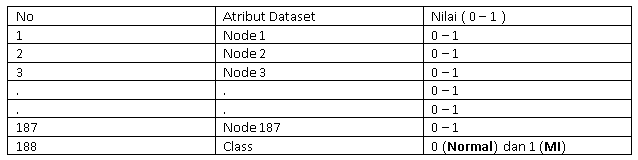

In [4]:
X = data[:,0:187]
Y = data[:,187]

# Preprocessing dataset.

Dataset yang diambil pada kaggle ini sudah dipreprosessing oleh `syahanfazeli` dengan cara :
    
    1. Scaling => mengubah nilai data menjadi 0 sampai 1
    2. Memotong sinyal ptb sebanyak 187 node/beat. 

## Reduksi Fitur
    Disini digunakan PCA ( Principal Component Analysis ) untuk mereduksi fitur yang banyak menjadi fitur yang lebih sedikit namun bisa merepresentasikan hampir semua informasi fitur tanpa mengurangi informasi yang signifikan.

In [31]:
pca = PCA(n_components=12)
all_feature_pca = pca.fit_transform(X)

## Splitting data

    Data fitur dan label dibagi menjadi data train dan test dengan ratio 9 : 1
    
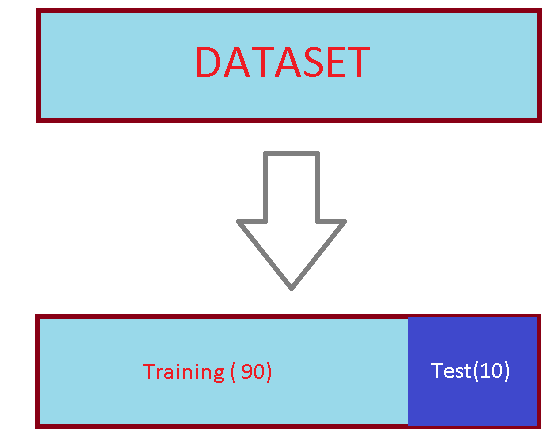

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(
    all_feature_pca, Y, test_size=0.1, random_state=2)

(array([ 401.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1055.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

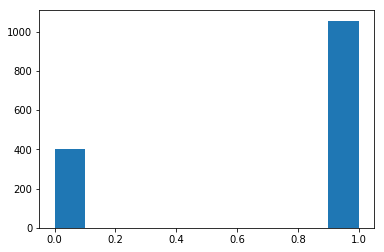

In [33]:
plt.hist(Y_test)

# Model ANN

Disini digunakan model `Sequential()`. Pada Model ini terdapat `Input layer` , `Hidden layer` dan `Output layer`. 

<strong>Penentuan Jumlah Layer ditentukan sebagai berikut </strong>:

    a. Jumlah dari input layer itu sama dengan jumlah fitur yang diberikan kepada mesin.
    b. Jumlah dari Hidden layer ditentukan sesuai dengan atau lebih besar dari Input layer.
    c. Jumlah dari Output Layer sesuai dengan kolom yang diberikan kepada mesin.
  
  
<strong>Jumlah layer yang ditentukan adalah </strong>:

    1. Input layer          -> Layer pertama terbentuk dari 12 layer Neural sesuai fitur dengan menggunakan activation                                    relu.
    2. Hidden Layer pertama -> 12 units Neural Network dengan menggunakan activation relu.
    3. Hidden Layer Kedua   -> 12 units Neural Network dengan menggunakan activation relu.
    4. Output layer         -> 1 unit Neural Network dengan menggunakan activation sigmoid.

In [34]:
model = Sequential()
model.add(Dense(units= 100, input_dim =12 , activation=relu))
model.add(Dense(units= 100, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))

# Compile Model

Model Dicompile dengan Optimizer adam dengan fungsi loss Binary Crossentropy.

Disini ada parameter optimizer `adam` yaitu `learning_rate`.

`Learning_rate` yaitu seberapa teliti mesin itu belajar. Semakin kecil nilai learning rate ,maka semakin teliti mesin belajar dan semakin tinggi kesempatan untuk mendapatkan hasil yang bagus. `Learning rate yang tinggi` memiliki kelemahan yaitu, waktu untuk proses training yang lama.

In [35]:
model.compile(optimizer=rmsprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# MenTraining model dengan data train serta Validasi dengan data Test

Model yang sudah dibentuk itu dilakukan proses pembelajaran sesuai dengan **data train** dan menvalidasi proses pembelajaran mesin dengan data validasi yaitu **data testing**. 

Adapun parameter yang bisa di tuning yaitu :

1. `batch_size` => Seberapa banyak sample yang dimasukkan ke dalam Model dalam satu iterasi
2. `epochs`  => Seberapa banyak mesin mengulang pembelajaran sampai nilai weight tidak berubah lagi. Nilai epochs yang direkomendasikan adalah 100 karena biasanya dengan nilai 100, performa mesin sudah konvergen.

In [36]:
acc_training = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, 
                         epochs=70)

Train on 13096 samples, validate on 1456 samples
Epoch 1/70
13096/13096 [==============================] - 1s 80us/step - loss: 0.4928 - accuracy: 0.7392 - val_loss: 0.4245 - val_accuracy: 0.7617
Epoch 2/70
13096/13096 [==============================] - 1s 70us/step - loss: 0.4087 - accuracy: 0.7908 - val_loss: 0.3821 - val_accuracy: 0.7981
Epoch 3/70
13096/13096 [==============================] - 1s 69us/step - loss: 0.3807 - accuracy: 0.8110 - val_loss: 0.3623 - val_accuracy: 0.8152
Epoch 4/70
13096/13096 [==============================] - 1s 72us/step - loss: 0.3645 - accuracy: 0.8193 - val_loss: 0.3477 - val_accuracy: 0.8317
Epoch 5/70
13096/13096 [==============================] - 1s 64us/step - loss: 0.3518 - accuracy: 0.8281 - val_loss: 0.3363 - val_accuracy: 0.8372
Epoch 6/70
13096/13096 [==============================] - 1s 66us/step - loss: 0.3406 - accuracy: 0.8363 - val_loss: 0.3255 - val_accuracy: 0.8496
Epoch 7/70
13096/13096 [==============================] - 1s 66us/ste

# Perhitungan Akurasi

In [37]:
acc_testing  = model.evaluate(X_test, Y_test) 
acc_testing

1456/1456 [==============================] - 0s 14us/step


[0.18004868638056976, 0.9333791136741638]

# Evaluasi Model dengan Melihat Plot

Kasus : 

1. `Overfitting`
=> Overfitting terjadi apabila hasil akurasi dari data testing itu **lebih rendah** daripada data training.

2. `Underfitting`
=> Underfitting terjadi apabila hasil akurasi dari data testing itu **lebih tinggi** daripada data training.

3. `Fit`
=> Fit apabila hasil akurasi dari data testing **tidak berbeda jauh** daripada data training. **Kasus yang inilah yang paling bagus**.

# Plot hasil akurasi training dan akurasi testing

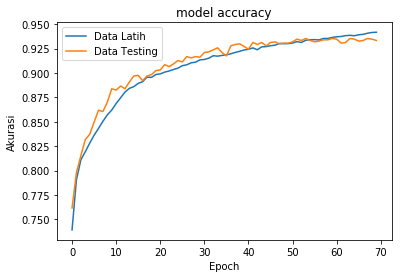

In [38]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

# Plot hasil Loss antara training dan testing

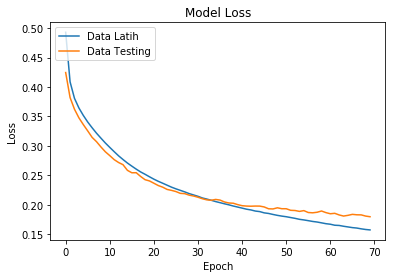

In [39]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

# Confusion Matrix
    Confusion Matrix adalah sebuah tabel yang berisi 2 jenis nilai yaitu Nilai prediksi dan Nilai Dataset(nilai yang benar). Nilai tersebut dipecah menjadi 4 dan akan dibandingkan untuk mendapatkan informasi tentang performa model learning.
    
Misal : `0` ( positive ) dan `1` ( negative ).
    1. True Positive = Mesin memprediksi positive dan benar
    2. True Negative = Mesin memprediksi negative dan benar
    3. False Positive = Mesin memprediksi Positive dan padahal negative 
    4. False Negative = Mesin memprediksi negative dan padahal positive

Dibawah ini adalah Hasil Confusion Matrix Model ANN.
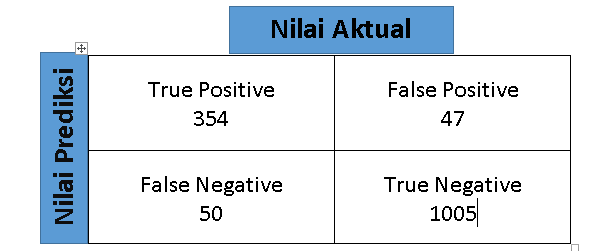

In [40]:
prediction = model.predict_classes(X_test)
cm = confusion_matrix(Y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print ("Confussion matriks:\n",cm)


Confussion matriks:
 [[ 354   47]
 [  50 1005]]


# Evaluasi Model dengan Confusion Matrix

Pada Confusion matrik ada banyak penilaian yang bisa diambil untuk mengukur performa dari model learning. Namun yang sering dipakai adalah :

1. `Akurasi` = Perbandingan Seberapa banyak model mengklasifikasi kelas yang benar dengan total kelas yang ada.

        Akurasi = (TP+TN)/(TP+TN+FP+FN)

2. `Recall` = Seberapa akurat mesin untuk mengklasifikasi kelas yang `positif`.

        Recall = TP/(TP+FN)

3. `Presisi` = Perbandingan prediksi kelas yang `positif yang benar` dengan semua prediksi kelas `positif`.

        Presisi = TP/(TP+FP)
        
4. `F1` = Nilai rata-rata dari Recall dan Presisi 
        
        F1 = (2*Presisi*recall) / (presisi+recall)



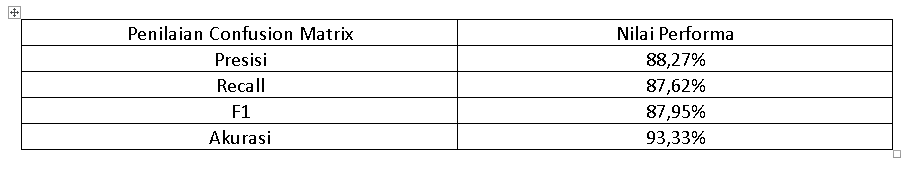

In [41]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)


print ("precesion : ",precision*100)
print("recall : ",recall*100)
print ("F1 : ",f1*100)
print("akurasi : ",akurasi*100)

precesion :  88.2793017456359
recall :  87.62376237623762
F1 :  87.95031055900621
akurasi :  93.33791208791209


In [42]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       401
         1.0       0.96      0.95      0.95      1055

   micro avg       0.93      0.93      0.93      1456
   macro avg       0.92      0.92      0.92      1456
weighted avg       0.93      0.93      0.93      1456



# Referensi

Dataset = https://www.kaggle.com/shayanfazeli/heartbeat

Paper = Mohammad Kachuee, Shayan Fazeli, and Majid Sarrafzadeh. "ECG Heartbeat Classification: A Deep Transferable Representation."https://arxiv.org/abs/1805.00794